# EDF - Code your Future Hackathon

## Introduction

Welcome to the EDF - Code Your Future Hackathon. 

#### Problem Statement: You have a dataset, this is a raw dataset obtained from numerous properties in the UK. You are trying to create an algorithm to predict the heating load of a property. You do not need to understand the science behind heating loads, energy transfer etc. Try focus more on the data rather than the context, though, some context does help. 

In a real life situation, you will never get clean data. You will have anomalies, nulls, or data that just doesn't make sense.

This data has been purposely edited to reflect some of that.
- It has random data
- Anomalies
- Null values
- Messy data in general

Your task is to clean and explore this data using various data manipulation techniques in python that we will teach you. Once you have got the data to a good state, you can then pass it through a Machine Learning Model. This notebook is a skeleton of steps, with some hard steps taken for you, but feel free to change or manipulate any existing code to really understand it.

Steps are as followed:
- Clean and explore the data
- Pass it through the Machine learning model

At the end of this, we will give each team a score, to see who did the best prediction model. Remember, its not just the model that affects how well you predict things. Data cleaning and manipulation play a massive role. So even if you dont want to understand the maths of a model, cleaning and manipulating data, makes all the difference. 

## This is the solutions notebook

### Importing the relevant packages
Feel free to install or include more packages in your project, just run this cell again. 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

### Functions
These are some functions that we have designed for you to use that would help as tools. In your task. 

In [53]:

# Recode surface area and extract useful text from wall_description
def extract_figures(text, position = -3):
    # text <- string to extract information from
    # position <- integer that tells the position of number in string
    listOfWords = text.split()
    word = listOfWords[position]
    return word

def create_correlation_map(df):
    plt.figure(figsize=(16, 6))
    # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
    # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

def pretty_print_coefficients(model, columns):
    # Function to display estimated coefficients in a more human-readable way

    # coef -> np.array: estimated regression coefficients
    # columns -> list of str: columns used for prediction

    coefDf = pd.DataFrame({"Feature": columns,"Coefficients": model.coef_[0]})
    coefDf.head(len(columns))
    return coefDf

### Loading in the data

In [54]:
# Load in the energy.csv data
df = pd.read_csv("energy_noisy_train.csv")

The data is now inside the notebook, and you can do all sorts of manipulation on the data by calling the variable df. Try running the cell below to see the data that's now saved in the notebook. Of course, you can call it other than 'df' (convention to denote dataframe).

In [55]:
df.head()

,Unnamed: 0,Relative Compactness,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Location,surface_area_categories,wall_description,energxe
0,223,0.71,220.5,3.5,5,0.10,4.407175,10.72,Mountain,High Surface Area,The wall colour is green and the area is 269.5...,571.0
1,285,0.62,220.5,3.5,3,0.10,3.725392,12.74,City,Very High Surface Area,The wall colour is indigo and the area is 367....,NaN
2,350,0.82,147.0,7.0,4,0.25,1.530090,25.38,Countryside,Low Surface Area,The wall colour is orange and the area is 318....,NaN
3,363,0.74,220.5,3.5,5,0.25,2.007144,12.30,City,Average Surface Area,The wall colour is orange and the area is 245....,395.0
4,551,0.76,122.5,7.0,5,0.40,1.649852,40.43,Seaside,Average Surface Area,The wall colour is indigo and the area is 416....,NaN


## Exploratory Data Analysis & Cleaning

This is part one of the task, we need to do an (exploratory data analysis) EDA as well as clean the dataset.

Hints/steps to take

- Identify the data attributes, explore the data. How long is it, how many rows are there. What columns, what datatypes are those columns? hints(Use: df.shape and df.dtypes)  
- A ML model cannot have categories that are too unique, if a category has (red, blue, green) thats three unique categories, but what about 50? Thats' too many unless you want the model to be complicated. Possible but not reasonable.
- What should we do with the null data?
- Do the continuous (numbered) columns have any relationship/correlation? explore this
- Explore the categorical data, plot bar charts, is there anything interesting/not important.
- Extra: What's interesting about the orientation column, is there something else we could do to it based on its context
- Extra: The sky is the limit, do as much manipulation/exploration as you want to get the data in a good state

#### Initial Explorations

In [56]:
# Solutions Notebook Only

# This code checks the shape of the dataframe. I.e. (Rows, Columns)
df.shape

(538, 12)

We know from above that there are 538 Rows and 13 Columns

In [57]:
# Solutions Notebook Only

# Now we'll check the list of columns to see if we can make sense of it
list(df.columns)

# Remove

['Unnamed: 0',
 'Relative Compactness',
 'Roof Area',
 'Overall Height',
 'Orientation',
 'Glazing Area',
 'Glazing Area Distribution',
 'Heating Load',
 'Location',
 'surface_area_categories',
 'wall_description',
 'energxe']

Make note, Unnamed:0 does not seem to mean anything at first glance, so we make note of this weird title, as a potential column to remove. It seems to be an old index from data saving etc. Everything else seems to serve a purpose and could contribute in what we want to predict. 

In [58]:
# Solutions Notebook Only

# We now have a quick look at the data
df.head()

,Unnamed: 0,Relative Compactness,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Location,surface_area_categories,wall_description,energxe
0,223,0.71,220.5,3.5,5,0.10,4.407175,10.72,Mountain,High Surface Area,The wall colour is green and the area is 269.5...,571.0
1,285,0.62,220.5,3.5,3,0.10,3.725392,12.74,City,Very High Surface Area,The wall colour is indigo and the area is 367....,NaN
2,350,0.82,147.0,7.0,4,0.25,1.530090,25.38,Countryside,Low Surface Area,The wall colour is orange and the area is 318....,NaN
3,363,0.74,220.5,3.5,5,0.25,2.007144,12.30,City,Average Surface Area,The wall colour is orange and the area is 245....,395.0
4,551,0.76,122.5,7.0,5,0.40,1.649852,40.43,Seaside,Average Surface Area,The wall colour is indigo and the area is 416....,NaN


From above it seems (at first glance) Unnamed: 0 is a random number, still making note of this. Other columns, although units are unknown, seem to be important. Making note that there are a few categorical columns without numbers: Location, surface area categories, and possibly wall description. energxe is also an odd column which seems has alot of nulls.

Make note that wall description has potentially useless data, i.e. the colour, and there is a number associated in each row. This could be useful. Make note to potentially extract colour and number from that column where possible

In [59]:
# Solutions Notebook Only

# Checking the data types so we understand the columns better
df.dtypes

Unnamed: 0                     int64
Relative Compactness         float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution    float64
Heating Load                 float64
Location                      object
surface_area_categories       object
wall_description              object
energxe                      float64
dtype: object

Most are floats and integers. The categorical is an object. We make note of this. 

We have 3 columns that seeem categorical with strings, we want to see if this would be useful for us in a ML model. If every category has about 200 unique entries, then its too unique for an ML model. 
See below:

In [60]:
# Solutions Notebook Only

STRING_COLUMNS = ['Location', 'surface_area_categories', 'wall_description']

for col in STRING_COLUMNS:
    number_unique = df[col].nunique()
    print(col)
    print(number_unique)

Location
6
surface_area_categories
5
wall_description
56


Wall Description has 56 unique values in that column, this cannot be used as a categorical column. And previously we noted that its data is a bit messy. This can be cleaned by isolating colour and number. As we spot this, we can do this now.

In [61]:
# We utilise the extract figures function we defined before and used a .apply on the columns to do this. 

df["Wall Area"] = df["wall_description"].apply(lambda x: float(extract_figures(x, -3)))
df["Colour"] = df["wall_description"].apply(lambda x: extract_figures(x, 4))
df.head()

,Unnamed: 0,Relative Compactness,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Location,surface_area_categories,wall_description,energxe,Wall Area,Colour
0,223,0.71,220.5,3.5,5,0.10,4.407175,10.72,Mountain,High Surface Area,The wall colour is green and the area is 269.5...,571.0,269.5,green
1,285,0.62,220.5,3.5,3,0.10,3.725392,12.74,City,Very High Surface Area,The wall colour is indigo and the area is 367....,NaN,367.5,indigo
2,350,0.82,147.0,7.0,4,0.25,1.530090,25.38,Countryside,Low Surface Area,The wall colour is orange and the area is 318....,NaN,318.5,orange
3,363,0.74,220.5,3.5,5,0.25,2.007144,12.30,City,Average Surface Area,The wall colour is orange and the area is 245....,395.0,245.0,orange
4,551,0.76,122.5,7.0,5,0.40,1.649852,40.43,Seaside,Average Surface Area,The wall colour is indigo and the area is 416....,NaN,416.5,indigo


As seen above, you've created colour column and Wall Area, we can now drop wall_description. Wall area is now a number and colour is categorical. 

In [62]:
# Solutions Notebook

df.drop(columns = 'wall_description', inplace = True)

In [63]:
# Solutions Notebook

# Checking that colour does not have too many categories:
df['Colour'].nunique()

8

8 is small enough to be considered a categorical column, however make note that colour probably has nothing to do with heating load (logically) so we should keep that in mind

#### Null explorations

Now we check the nulls.

Hints 
Possible to use: df.isnull().sum()

Make decisions based on this and possibly use: df.dropna() 
(Be weary when using this to make sure you don't lose too much data if you do this)

<AxesSubplot:>

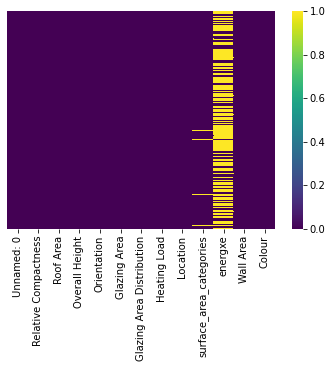

In [64]:
# Solutions Notebook

# Checking the Null values graphically 
sns.heatmap(df.isnull(),yticklabels=False, cmap='viridis')

In [65]:
# Solutions Notebook

df.isnull().sum()

Unnamed: 0                     0
Relative Compactness           0
Roof Area                      0
Overall Height                 0
Orientation                    0
Glazing Area                   0
Glazing Area Distribution      0
Heating Load                   0
Location                       0
surface_area_categories        5
energxe                      349
Wall Area                      0
Colour                         0
dtype: int64

In [66]:
# Solutions Notebook

len(df)

538

You can drop those rows as it's so small. and drop the column energxe as it has too many nulls to even derive a relationship. It's possible sometimes nulls could mean something, however, in this case from explorations it doesn't seem like a column that provides value. 

Other ways to deal with nulls is to impute it with the average or median, but in this case. Not required. 


In [67]:
# Solutions Notebook

df.drop(columns = 'energxe', inplace = True)
df.dropna(inplace = True)

In [68]:
# Solutions Notebook

df.isnull().sum()

Unnamed: 0                   0
Relative Compactness         0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Location                     0
surface_area_categories      0
Wall Area                    0
Colour                       0
dtype: int64

### Some more EDA

Now data seems clean at a glance, we should start doing explorations to see if it can be cleaned more/if theres some redundent stuff in there. 

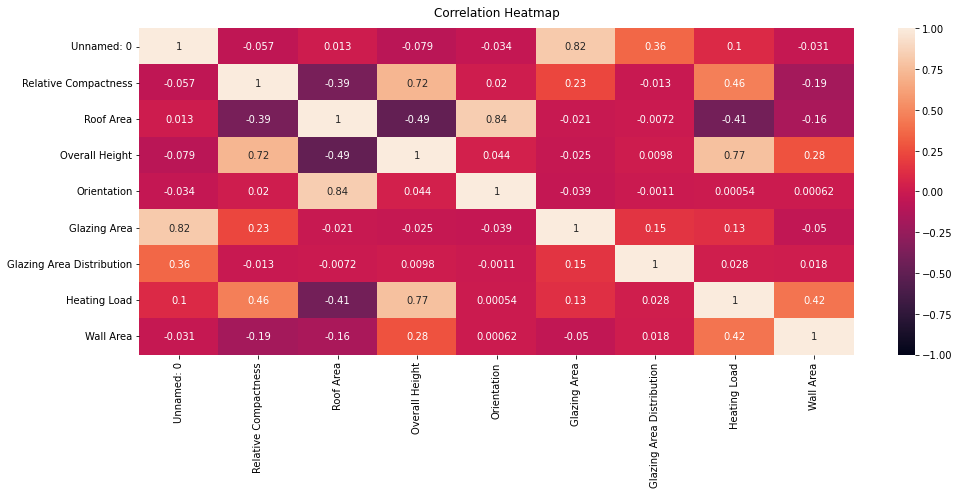

In [69]:
# This is a function that we defined earlier, be sure to look at this function to see if you understand it. 
# It creates a correlation map where 1 means perfect correlation. This is to identify relationships.
create_correlation_map(df)


We know the unnamed column seems uselss, and it has a high relationship with glazing area, so if we have glazing area, we dont need unnamed. It seems to be a redundant column that may mess with our data. We can choose to remove this now, or test it with the model later. In this case we decide to remove it now.

Lets look at what has a high correlation with heating load. It seems height, and roof area is very important to predict heating load. So we should make sure these columns are cleaned and note their good relationship.

In [70]:
# Solutions Notebook

df.drop(columns = 'Unnamed: 0', inplace = True)

Now, check the relationships graphically.

Hint: Use sns.pairplot(df)

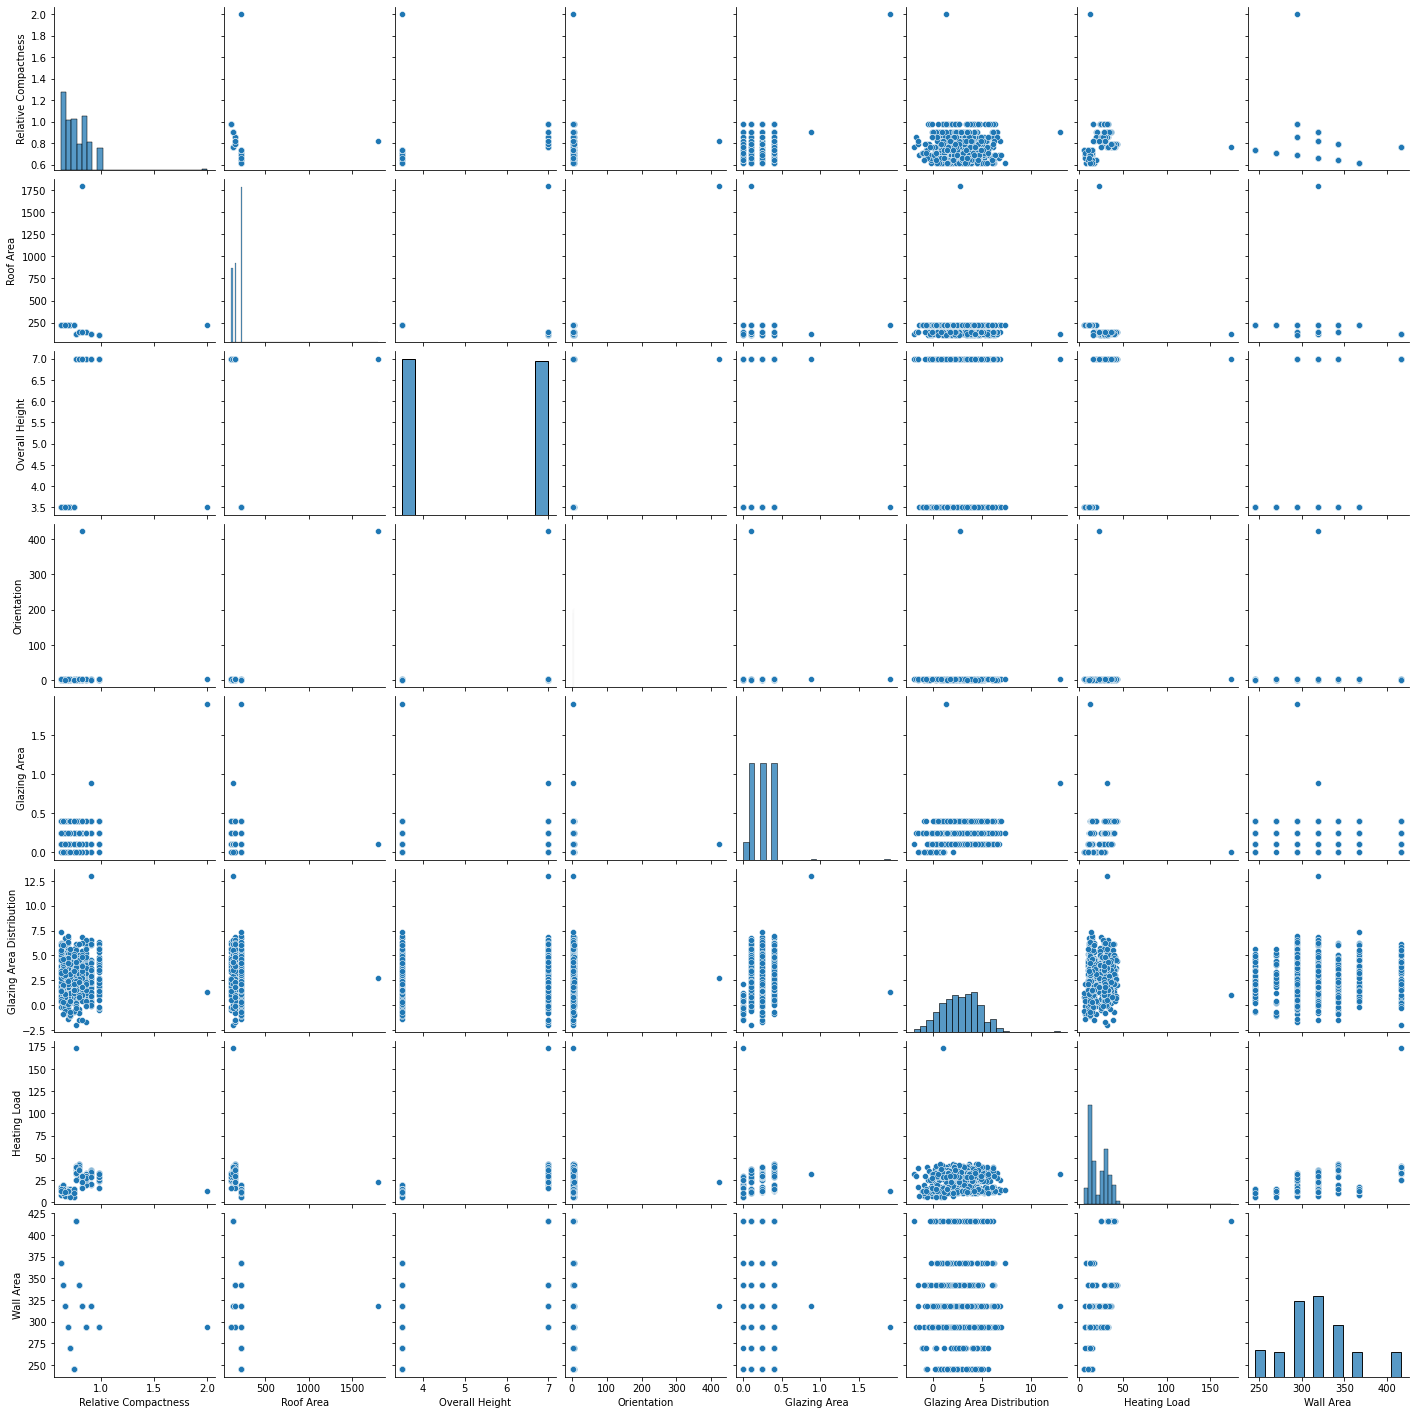

In [71]:
# Solutions Notebook

sns.pairplot(df)

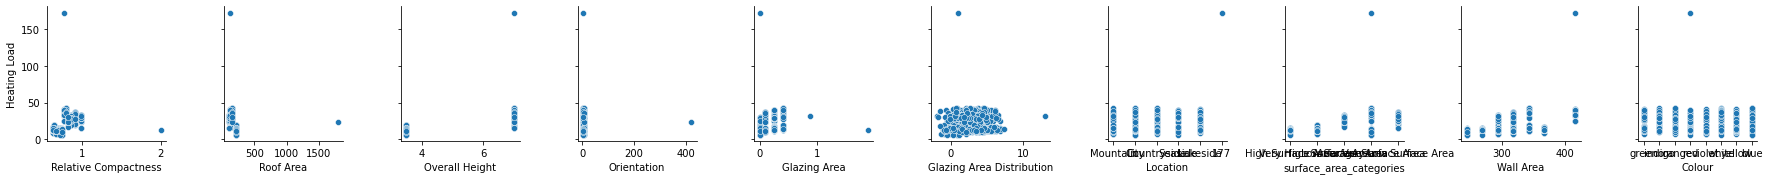

In [72]:
# Solutions Notebook


# Verify linear relationship
columns = list(df)

columns.remove("Heating Load")

g = sns.pairplot(df, 
                 x_vars=columns,
                 y_vars=["Heating Load"])

plt.show()

Take a look at the graphs above! Something stands out on the Relative Compactness, Roof Area, Overall Height and Orientation graphs! Those are likely extreme values and should be removed before proceeding to fit any machine learning model.

While we're at it - there are 2 extreme observations for the variables we want to predict (Heating load) that we should remove as well.

From this you see the correlation coresponds to some of the relationships you see above. You also notice there are alot of anomalies! Let's check some of these with Boxplots. 

#### Hint: Use sns.boxplot(x=df['COLUMN NAME']) 

If you think these anomalies are not useful, then delete these. Filter out these numbers

<AxesSubplot:xlabel='Relative Compactness'>

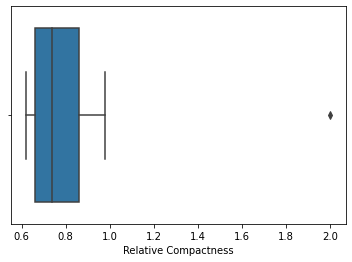

In [73]:
# Solutions notebook

#EXAMPLE OF BOXPLOT

sns.boxplot(x=df['Relative Compactness'])

Removing the anomalies based on our decisions. e.g below for relative compactness

In [74]:
# Solutions Notebook 

df.drop(df[df["Relative Compactness"] > 1.5].index, inplace=True)
df.drop(df[df["Roof Area"] > 1000].index, inplace=True)
df.drop(df[df["Overall Height"] > 600].index, inplace=True)
df.drop(df[df["Orientation"] > 300].index, inplace=True)
df.drop(df[df["Glazing Area"] > 0.75].index, inplace=True)

df.drop(df[df["Heating Load"] > 100].index, inplace=True)

Now checking, there are no more anomalies

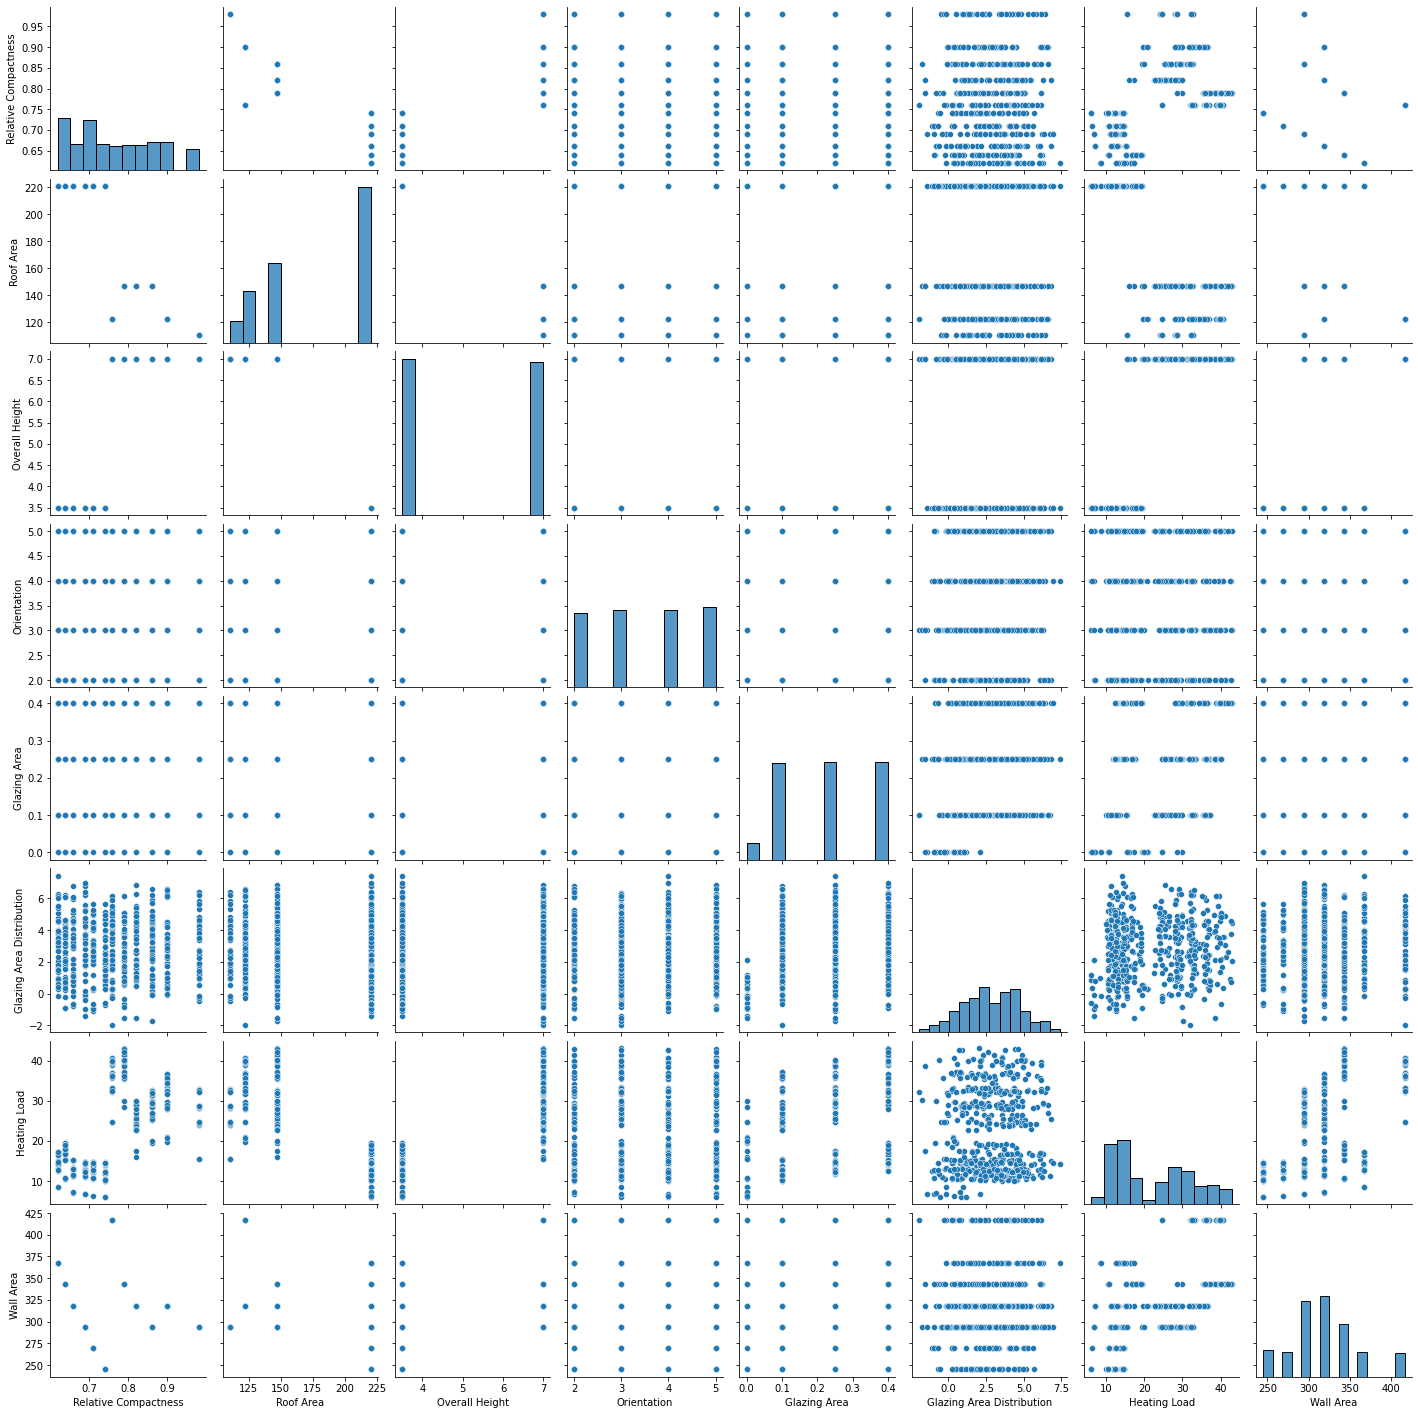

In [75]:
# Solutions Notebook 

sns.pairplot(df)

#### Let's explore some categorical features

Hints
- Use sns.countplot
- Use sns.barplot
- Use any more visualisations to understand the categories!

Dont forget to use google to see the documentation!

With categorical feature, you see that colour is just random, you could see if it can be used in the model, but in this case since logically colour doenst seem to affect, and from below, they all seem equal volumes. We decide to remove this


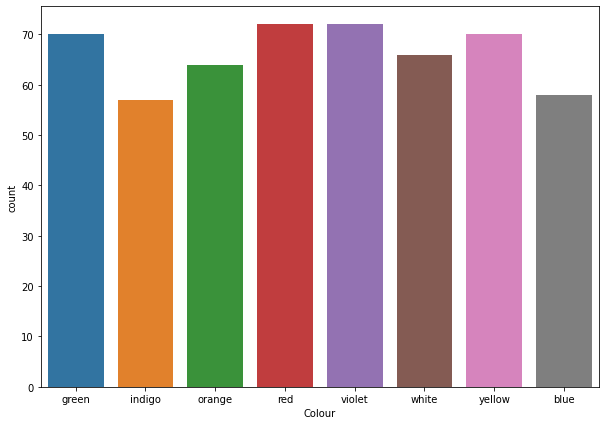

In [76]:
# Solutions Notebook 
plt.figure(figsize=(10,7))
ax = sns.countplot(x="Colour", data=df)

In [77]:
# Solutions Notebook 

df.drop(columns = 'Colour', inplace = True)

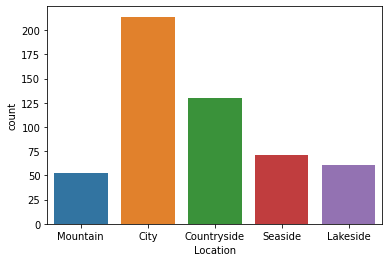

In [78]:
# Solutions Notebook 

ax = sns.countplot(x="Location", data=df)

Seems location are mostly in the city. Location could affect, but not sure at this point. Perhaps keep it for the model.

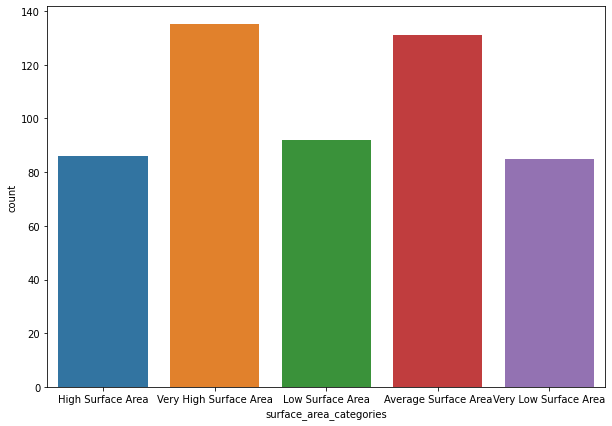

In [79]:
# Solutions Notebook 
plt.figure(figsize=(10,7))
ax = sns.countplot(x="surface_area_categories", data=df)

Now let's see the bar plot with heating load (what we are predicting)

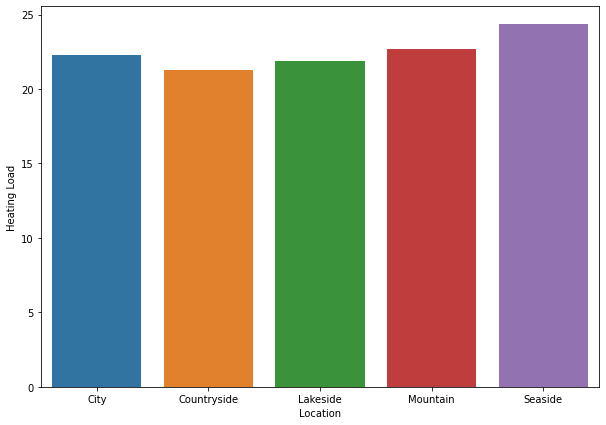

In [80]:
# Solutions Notebook 
plt.figure(figsize=(10,7))
location_heating_average_rating  = df.groupby(by =['Location']).mean().reset_index()
ax=sns.barplot(x="Location", y="Heating Load", data=location_heating_average_rating)

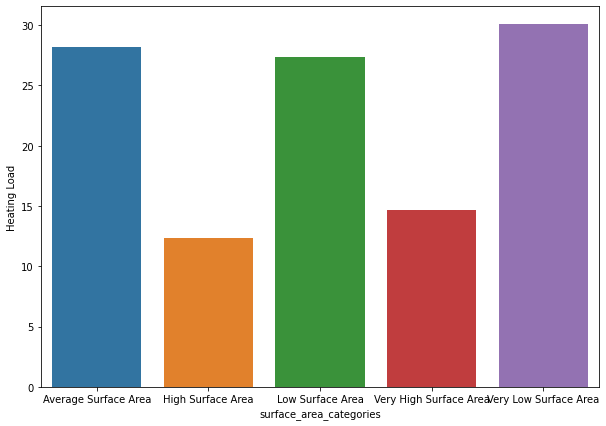

In [81]:
# Solutions Notebook 
plt.figure(figsize=(10,7))
location_heating_average_rating  = df.groupby(by =['surface_area_categories']).mean().reset_index()
ax=sns.barplot(x="surface_area_categories", y="Heating Load", data=location_heating_average_rating)

It seems surface area is important, definitely keep and use this column for the model. It seems Low surface areas have higher heating loads!

In [82]:
df.head()

,Relative Compactness,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Location,surface_area_categories,Wall Area
0,0.71,220.5,3.5,5,0.10,4.407175,10.72,Mountain,High Surface Area,269.5
1,0.62,220.5,3.5,3,0.10,3.725392,12.74,City,Very High Surface Area,367.5
2,0.82,147.0,7.0,4,0.25,1.530090,25.38,Countryside,Low Surface Area,318.5
3,0.74,220.5,3.5,5,0.25,2.007144,12.30,City,Average Surface Area,245.0
4,0.76,122.5,7.0,5,0.40,1.649852,40.43,Seaside,Average Surface Area,416.5


It seems the data is ready to be passed to the machine learning model. We've also identified some relationships so we can make better decisions and understand relationships.

## Machine Learning side

Congratulations! Now you should have a good idea of the data and cleaned it ready to pass through a machine learning model. 

Everything in this section is prefilled apart from DUMMY VARIABLES.

We are keeping most of this section more as a playground section as an introductory.

#### Before the ML model, we must turn all the categorical columns into dummy variables.

In [83]:
# Create dummy variables out of surface area categories
colNames = ["Very Low Surface Area", "Low Surface Area", "Average Surface Area", "High Surface Area", "Very High Surface Area"]
df[colNames] = pd.get_dummies(df["surface_area_categories"],dtype=int)


# Create dummy columns for location variable
colNames = ["Mountain", "City", "Countryside", "Seaside", "Lakeside"]
df[colNames] = pd.get_dummies(df["Location"],dtype=int)

# Drop redundant columns
df.drop(labels=["surface_area_categories", "Location"], axis=1, inplace=True)
df.head()

,Relative Compactness,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Wall Area,Very Low Surface Area,Low Surface Area,Average Surface Area,High Surface Area,Very High Surface Area,Mountain,City,Countryside,Seaside,Lakeside
0,0.71,220.5,3.5,5,0.10,4.407175,10.72,269.5,0,1,0,0,0,0,0,0,1,0
1,0.62,220.5,3.5,3,0.10,3.725392,12.74,367.5,0,0,0,1,0,1,0,0,0,0
2,0.82,147.0,7.0,4,0.25,1.530090,25.38,318.5,0,0,1,0,0,0,1,0,0,0
3,0.74,220.5,3.5,5,0.25,2.007144,12.30,245.0,1,0,0,0,0,1,0,0,0,0
4,0.76,122.5,7.0,5,0.40,1.649852,40.43,416.5,1,0,0,0,0,0,0,0,0,1


### EXTRA: could there be any other columns in the dataset that could be treated as a categorical column? What can you do.

Orientation is a categorical column despite having integers, this is important as it would skew the model if it was treated as numerical. For example, logically, orientation 1 is the same as orientation 2, but in numerical turns, orientation 2 is more positive, when they are at the same level but mean different things. Hence, we should make this categorical and also make dummy variables

In [84]:
# Create dummy values for Orientation
colNames = ["North Orientation", "East Orientation", "South Orientation", "West Orientation"]
df[colNames] = pd.get_dummies(df["Orientation"],dtype=int)
# Drop redundant columns
df.drop(labels=["Orientation"], axis=1, inplace=True)
df.head()

,Relative Compactness,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution,Heating Load,Wall Area,Very Low Surface Area,Low Surface Area,Average Surface Area,...,Very High Surface Area,Mountain,City,Countryside,Seaside,Lakeside,North Orientation,East Orientation,South Orientation,West Orientation
0,0.71,220.5,3.5,0.10,4.407175,10.72,269.5,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0.62,220.5,3.5,0.10,3.725392,12.74,367.5,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0.82,147.0,7.0,0.25,1.530090,25.38,318.5,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0.74,220.5,3.5,0.25,2.007144,12.30,245.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.76,122.5,7.0,0.40,1.649852,40.43,416.5,1,0,0,...,0,0,0,0,0,1,0,0,0,1


### Linear Regression Model

Below we added all the variables we think could be highly relevant to the ML model - and your job is to find the best ones among them! We also added a variable for the number of folds (how many groups the data should be split into) which you can use to reduce or increase the training set.
We also added the option to change the random seed. This changes which observations go to which group - a good model predicts accurately, no matter what random seed value is given to it.

After you make changes to the model, make sure to re-run the 3 cells below to update the model results.

In [85]:
# Explain the variables below to understand what they can vary. 

# Playground area - edits these and see how the model Linear Regression model changes!
depVars = ['Relative Compactness', 
'Roof Area', 
'Overall Height', 
#"North Orientation",
#"East Orientation",
#"South Orientation",
#"West Orientation" 
'Glazing Area', 
'Glazing Area Distribution', 
#"Mountain",
#"City",
#"Countryside",
#"Seaside",
#"Lakeside"
'Wall Area', 
'Very Low Surface Area', 
'Low Surface Area', 
'Average Surface Area', 
'High Surface Area', 
'Very High Surface Area']

outcomeVar = "Heating Load"

numberOfFolds = 3
randomSeed = 42

In [86]:
# Now build the Linear Model from settings above
X = pd.DataFrame(df[depVars])
Y = pd.DataFrame(df[outcomeVar])

model = LinearRegression()
rScores = list()
kFold = KFold(n_splits=numberOfFolds, shuffle=True, random_state=randomSeed)

for _, (train, test) in enumerate(kFold.split(X, Y)):
    model.fit(X.iloc[train,:], Y.iloc[train,:])
    score = model.score(X.iloc[test,:], Y.iloc[test,:])
    rScores.append(score)

rScores

[0.9729227623373188, 0.9699769716590502, 0.9748411721612356]

In [87]:
# Check estimated coefficients
pretty_print_coefficients(model, depVars)

,Feature,Coefficients
0,Relative Compactness,34.835775
1,Roof Area,0.281596
2,Overall Height,11.640947
3,Glazing Area,19.886372
4,Glazing Area Distribution,0.059157
5,Wall Area,0.054888
6,Very Low Surface Area,3.074971
7,Low Surface Area,2.645203
8,Average Surface Area,-8.686788
9,High Surface Area,3.828052


The outcome from the 2nd cell is the r-squared scores of the models from each test run. The higher those numbers are, the better. It reflects that your model explains more of the variation that is seen in the data and generally results in better predictions.

The final cell gives you the value for each coefficient from the last run. It is generally a good idea to take a look at these and see which variables are positively/negatively affecting the predicted outcome.

Below, you can play around with prediction - using the estimated coefficients from the model, you can see what heating load your model would predict for an actual house. You can even get some observations from the actual dataset and see how your predictions differ from the actual value. Remember - your model would not be judged on 1 prediction, so it is better to be correct in general than being extra precise for 1 use case.

Note: You should use the exact same variables for prediction (in the same order!) as you used when training your dataset.

### Predicting example

In [88]:
# Put in Markdown explanation

# Use trained model for prediction
newData = pd.DataFrame({
'Relative Compactness': 0.8, 
'Roof Area': 150, 
'Overall Height': 7, 
#"North Orientation": 0,
#"East Orientation": 0,
#"South Orientation": 1,
#"West Orientation": 0,
'Glazing Area': 0.45, 
'Glazing Area Distribution': 5, 
#"Mountain": 0,
#"City": 1,
#"Countryside": 0,
#"Seaside": 0,
#"Lakeside": 0,
'Wall Area': 500, 
'Very Low Surface Area': 0, 
'Low Surface Area': 0, 
'Average Surface Area': 1, 
'High Surface Area': 0, 
'Very High Surface Area': 0
}, index=[0])

model.predict(newData)

array([[41.59782143]])

#### Ridge Regression

By the time you read this, you should be familiar with all but the last 2 options/parameters you see in the cell below (if not, please read the description above the section for linear regression). The final 2 parameters control some specifics of the ridge regression:

penaltyParameter signifies how much negative score to give for large coefficients. If this value is increased, some estimated parameters (generally those that are the worst when it comes to prediction) will tend towards zero. Thus, this is a great way to see what variables are most important for your predictions.

standardizeData is a boolean indicating if data should be standardized. Standardization is beyond the scope of this Hackathon (although Google/YouTube is your friend if you want to know more about it) so the only thing you need to know is that if you set this to "True" then all potential variables are given an equal penalty. If set to "False", then variables which are the furthest away from 0 are given greater penalty than those which are closer to zero. I recommend leaving this as "True".

In [89]:
# Playground area - edits these and see how the Ridge Regression model changes!
depVars = ['Relative Compactness', 
'Roof Area', 
'Overall Height', 
#"North Orientation",
#"East Orientation",
#"South Orientation",
#"West Orientation" 
'Glazing Area', 
'Glazing Area Distribution', 
#"Mountain",
#"City",
#"Countryside",
#"Seaside",
#"Lakeside"
'Wall Area', 
'Very Low Surface Area', 
'Low Surface Area', 
'Average Surface Area', 
'High Surface Area', 
'Very High Surface Area']

outcomeVar = "Heating Load"
numberOfFolds = 3
randomSeed = 42
penaltyParameter = 1
standardizeData = True

In [90]:
# Takes care of data standardization process (only run once)
scaler = StandardScaler()

X = pd.DataFrame(df[depVars])
Y = pd.DataFrame(df[outcomeVar])

if standardizeData:
    scaler.fit(X.values)
    scaledData = scaler.transform(X)
    standardDf = pd.DataFrame(scaledData, index=X.index, columns=X.columns)

else:
    standardDf = df

In [91]:
# Fit actual Ridge Regression model
model = Ridge(alpha=penaltyParameter)
rScores = list()
kFold = KFold(n_splits=numberOfFolds, shuffle=True, random_state=randomSeed)

for _, (train, test) in enumerate(kFold.split(X, Y)):
    model.fit(X.iloc[train,:], Y.iloc[train,:])
    score = model.score(X.iloc[test,:], Y.iloc[test,:])
    rScores.append(score)

rScores

[0.9722850150166756, 0.9644943773497127, 0.9742457719154707]

In [92]:
# Ridge regression coefficients = higher values indicate better correlation between predictor and outcome
pretty_print_coefficients(model, depVars)

,Feature,Coefficients
0,Relative Compactness,0.375911
1,Roof Area,0.173863
2,Overall Height,10.580892
3,Glazing Area,17.153368
4,Glazing Area Distribution,0.093342
5,Wall Area,0.019649
6,Very Low Surface Area,2.696185
7,Low Surface Area,1.909377
8,Average Surface Area,-7.758811
9,High Surface Area,3.164169


The outcome from the 2nd cell is the r-squared scores of the models from each test run. The higher those numbers are, the better. It reflects that your model explains more of the variation that is seen in the data and generally results in better predictions.

The final cell gives you the value for each coefficient from the last run. It is generally a good idea to take a look at these and see which variables are positively/negatively affecting the predicted outcome. If any of these are close to zero, maybe they are not that relevant and should be removed after all.

Below, you can play around with prediction - using the estimated coefficients from the model, you can see what heating load your model would predict for an actual house. You can even get some observations from the actual dataset and see how your predictions differ from the actual value. Remember - your model would not be judged on 1 prediction, so it is better to be correct in general than being extra precise for 1 use case.

Note: You should use the exact same variables for prediction (in the same order!) as you used when training your dataset

Are the Ridge Regression predictions different from the Linear Regression predictions? If so, how? Is any of the two consistently better or worse?

In [93]:
# Prediction using Ridge Regression
# Use trained model for prediction
newData = pd.DataFrame({
'Relative Compactness': 0.8, 
'Roof Area': 150, 
'Overall Height': 7, 
#"North Orientation": 0,
#"East Orientation": 0,
#"South Orientation": 1,
#"West Orientation": 0,
'Glazing Area': 0.45, 
'Glazing Area Distribution': 5, 
#"Mountain": 0,
#"City": 1,
#"Countryside": 0,
#"Seaside": 0,
#"Lakeside": 0,
'Wall Area': 500, 
'Very Low Surface Area': 0, 
'Low Surface Area': 0, 
'Average Surface Area': 1, 
'High Surface Area': 0, 
'Very High Surface Area': 0
}, index=[0])

if standardizeData:
    newData = scaler.transform(newData)

model.predict(newData)

array([[-57.71722828]])

## INTERNAL USE ONLY ************

In [94]:
# TODO: Internal use only - for scoring submissions
columns = ['Relative Compactness', 
'Roof Area', 
'Overall Height', 
#'Orientation', 
'Glazing Area', 
'Glazing Area Distribution', 
#'Location', 
'Wall Area', 
'Very Low Surface Area', 
'Low Surface Area', 
'Average Surface Area', 
'High Surface Area', 
'Very High Surface Area']

df_test = pd.read_csv("energy_noisy_test.csv")

predictions = model.predict(df_test[columns])

errors = np.abs(np.array(predictions).flatten() - df_test["Heating Load"])
totalScore = (-1)*np.sum(errors)

totalScore

-321.1798595880311